In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#Objective: Predict if a passenger will survive on the Titanic

In [3]:
#Loading the data set from Seaborn and dispalying the top 5 rows
tdata=sns.load_dataset("titanic")
tdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
tdata['deck'].values

[NaN, 'C', NaN, 'C', NaN, ..., NaN, 'B', NaN, 'C', NaN]
Length: 891
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [5]:
 tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
tdata.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
tdata['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
tdata['survived'].value_counts()
#549 passengers did not survive and 342 did

0    549
1    342
Name: survived, dtype: int64

C:\Users\Sohini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

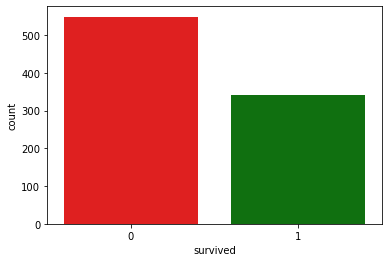

In [9]:
#Visualisint the survivor count
custompal=['red','green']
sns.set_palette(custompal)
sns.countplot(tdata['survived'])
plt.show

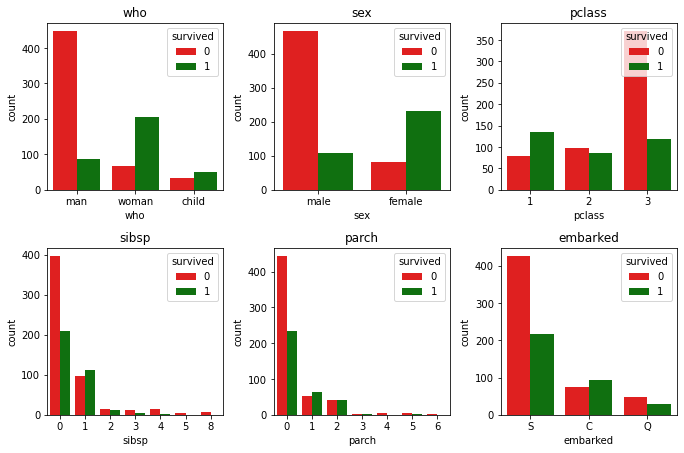

In [10]:
import warnings
warnings.filterwarnings("ignore")
#visualize survivor count based on the columns 'who', 'sex', 'pclass',	'sibsp',	'parch' &	'embarked'
cols=['who','sex','pclass','sibsp','parch','embarked']
nrows=2
ncols=3
fig,axs=plt.subplots(nrows,ncols,figsize=(ncols*3.2,nrows*3.2))

for r in range(0,nrows):
    for c in range(0,ncols):
        
        i=r*ncols + c #index to go through the no. of cols
        ax=axs[r][c]#show where to position each subplot
        sns.countplot(tdata[cols[i]],hue=tdata['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')
        
plt.tight_layout()
        
    

In [11]:
#survival rate by sex
tdata.groupby('sex')[['survived']].mean().round(2)

,survived
sex,
female,0.74
male,0.19


In [12]:
#survival rate by sex and class
tdata.pivot_table('survived',index='sex',columns='class').round(3)

class,First,Second,Third
sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


<AxesSubplot:xlabel='sex'>

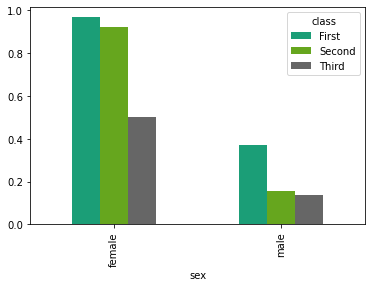

In [13]:
#survival rate by sex and class visually
tdata.pivot_table('survived',index='sex',columns='class').round(3).plot(colormap='Dark2',kind='bar')

<AxesSubplot:xlabel='class', ylabel='survived'>

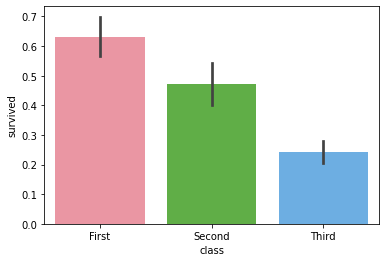

In [14]:
#plot survival rate of each class
sns.barplot(x='class',y='survived',data=tdata)

class            First  Second  Third
age      sex                         
(0, 18]  female   0.91    1.00   0.51
         male     0.80    0.60   0.22
(18, 80] female   0.97    0.90   0.42
         male     0.38    0.07   0.13


<AxesSubplot:xlabel='Age and Gender'>

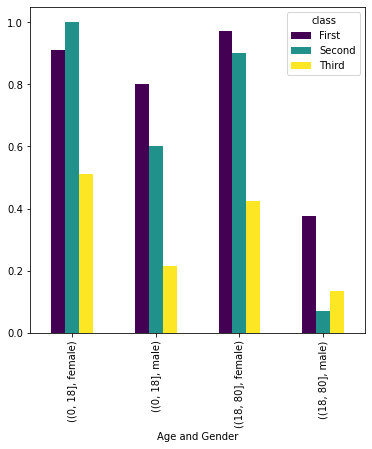

In [15]:
#survival rate by sex age and class
Agebin=pd.cut(tdata['age'],[0,18,80])
print(tdata.pivot_table('survived',[Agebin,'sex'],'class').round(2))
tdata.pivot_table('survived',[Agebin,'sex'],'class').plot(kind='bar',figsize=(6,6),colormap='viridis',xlabel='Age and Gender')

class        First  Second  Third
embark_town                      
Cherbourg     0.69    0.53   0.38
Queenstown    0.50    0.67   0.38
Southampton   0.58    0.46   0.19


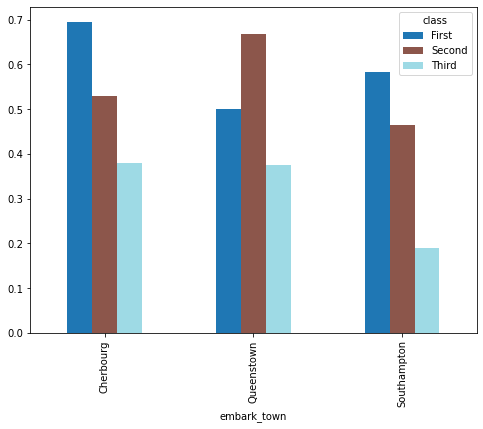

In [16]:
#survival rate by embarked_town and class visually
tdata.pivot_table('survived','embark_town','class').plot(kind='bar',figsize=(8,6),colormap='tab20')
print(tdata.pivot_table('survived','embark_town','class').round(2))

In [17]:
print(tdata.head())
#tdata.columns

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [18]:
#'survived','sex','age','sibsp','parch','fare','class','who','deck','embark_town']
tdata1=tdata[['survived','sex','age','sibsp','fare','pclass','embarked','parch']]
print(tdata1.head())
tdata.shape

   survived     sex   age  sibsp     fare  pclass embarked  parch
0         0    male  22.0      1   7.2500       3        S      0
1         1  female  38.0      1  71.2833       1        C      0
2         1  female  26.0      0   7.9250       3        S      0
3         1  female  35.0      1  53.1000       1        S      0
4         0    male  35.0      0   8.0500       3        S      0


(891, 15)

In [19]:
tdata1.dtypes

survived      int64
sex          object
age         float64
sibsp         int64
fare        float64
pclass        int64
embarked     object
parch         int64
dtype: object

In [20]:
tdata1.isna().sum()

survived      0
sex           0
age         177
sibsp         0
fare          0
pclass        0
embarked      2
parch         0
dtype: int64

In [21]:
#replacing null values in age by median
tdata1['age'].fillna(value=tdata1['age'].median(),inplace=True)

In [22]:
print(tdata1.shape)
tdata1.isna().sum()


(891, 8)


survived    0
sex         0
age         0
sibsp       0
fare        0
pclass      0
embarked    2
parch       0
dtype: int64

In [23]:
#removing Null values from embark town
tdata1=tdata1.dropna(subset=['embarked'])
tdata1.isna().sum()

survived    0
sex         0
age         0
sibsp       0
fare        0
pclass      0
embarked    0
parch       0
dtype: int64

In [24]:
tdata1.shape

(889, 8)

In [25]:
#data types of the columnns in the data set
tdata1.dtypes

survived      int64
sex          object
age         float64
sibsp         int64
fare        float64
pclass        int64
embarked     object
parch         int64
dtype: object

In [26]:
#converting categorical values to numerical for ML
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
encols=['sex','embarked']

tdata1[encols]=tdata1[encols].apply(lencode.fit_transform)
tdata1.head()


,survived,sex,age,sibsp,fare,pclass,embarked,parch
0,0,1,22.0,1,7.2500,3,2,0
1,1,0,38.0,1,71.2833,1,0,0
2,1,0,26.0,0,7.9250,3,2,0
3,1,0,35.0,1,53.1000,1,2,0
4,0,1,35.0,0,8.0500,3,2,0


In [27]:
tdata1.dtypes

survived      int64
sex           int32
age         float64
sibsp         int64
fare        float64
pclass        int64
embarked      int32
parch         int64
dtype: object

In [28]:
tdata1['embarked'].unique()

array([2, 0, 1])

In [29]:
tdata1.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
fare        0
pclass      0
embarked    0
parch       0
dtype: int64

In [30]:
#Split the data into Independent 'X' & Depenedent 'Y' variables

X=tdata1.loc[:,['sex','age','sibsp','fare','pclass','embarked','parch']]
print(X.head())
Y=tdata1.loc[:,'survived']
Y.head()

   sex   age  sibsp     fare  pclass  embarked  parch
0    1  22.0      1   7.2500       3         2      0
1    0  38.0      1  71.2833       1         0      0
2    0  26.0      0   7.9250       3         2      0
3    0  35.0      1  53.1000       1         2      0
4    1  35.0      0   8.0500       3         2      0


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [31]:
#Split the dataset into 80% training and 20% Test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [32]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)



In [33]:
#Using Logistic Regression
#training the model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)


LogisticRegression(random_state=0)

In [34]:
#training accuracy

print('Accuracy for the Logistic Regression is ',log.score(X_train,Y_train).round(2))

Accuracy for the Logistic Regression is  0.82


In [35]:
# R-Squared Value (Prediction power of a regression algorithm)
print('Train Score:',log.score(X_train,Y_train).round(2))
print('Test Score:',log.score(X_test,Y_test).round(2))

Train Score: 0.82
Test Score: 0.71


In [36]:
pred=log.predict(X_test)
print(pred)
print()
g=Y_test.to_numpy()
print(g)

[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1]

[0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1]


In [56]:
tdata1.head()

,survived,sex,age,sibsp,fare,pclass,embarked,parch
0,0,1,22.0,1,7.2500,3,2,0
1,1,0,38.0,1,71.2833,1,0,0
2,1,0,26.0,0,7.9250,3,2,0
3,1,0,35.0,1,53.1000,1,2,0
4,0,1,35.0,0,8.0500,3,2,0


In [53]:
X.head()

,sex,age,sibsp,fare,pclass,embarked,parch
0,1,22.0,1,7.2500,3,2,0
1,0,38.0,1,71.2833,1,0,0
2,0,26.0,0,7.9250,3,2,0
3,0,35.0,1,53.1000,1,2,0
4,1,35.0,0,8.0500,3,2,0


In [75]:
#mysurival chance
#1	0	38.0	1	71.2833	1	0	0
my_survival=[[0,32.0,7,1000,1,2,5]]
#my_survival=sc.fit_transform(my_survival)



In [76]:
#predict my survival

msp=log.predict(my_survival)
print(msp)

if msp==0:
    print("You will not survive")
else:
    print("You will survive")
    

[1]
You will survive


In [40]:
print('No.of non-zero co-efficients:',np.count_nonzero(log.coef_,0))

No.of non-zero co-efficients: [1 1 1 1 1 1 1]


In [41]:
print(log.coef_)
log.intercept_

[[-1.41616072 -0.66435287 -0.37886245  0.11318054 -0.91835099 -0.26868036
  -0.0869858 ]]


array([-0.71434424])

In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,log.predict(X_test))


In [43]:
#Extract TP, FP,TN,FNconfusion_matrix(Y_test,log.predict(X_test))
TP, FP,TN,FN=confusion_matrix(Y_test,log.predict(X_test)).ravel()
tsc=((TP+TN)/(TP+FP+FN+TN)).round(2)

print(cm)
print('*'*60)
print('Accuracy Score is ',tsc)

[[84 21]
 [30 43]]
************************************************************
Accuracy Score is  0.64


In [44]:
from sklearn.model_selection import cross_val_score
cv_5 = cross_val_score(log, X, Y, cv=5)
cv_5

array([0.78651685, 0.78651685, 0.78089888, 0.76966292, 0.81920904])

In [45]:
cv_10 = cross_val_score(log, X, Y, cv=10)
cv_10

array([0.78651685, 0.79775281, 0.76404494, 0.82022472, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.84090909])